# Process MIDI files
Since Thur. Nov. 11th, 2021

Will deal with songs as MIDI files, process them as 1D discrete pitch for each time slot


## Setup



In [17]:
import os
import glob

import pandas as pd
from mido import MidiFile
import pretty_midi
import librosa
from librosa import display
import matplotlib.pyplot as plt
import seaborn as sns
from icecream import ic

from data_path import *
from util import *
from util import MidoUtil as Mu, PrettyMidiUtil as Pmu


sns.set_style('darkgrid')

!ls ../../datasets/MIDI-eg


mids = eg_midis()
mids_pretty = eg_midis(pretty=True)
mid_eg = eg_midis('Shape of You')
ic(mid_eg)



AUD_DS1266.mid
Alan Walker - Faded (Carlo Prato).mid
Christina Perri - A Thousand Years (mididb).mid
Ed Sheeran - Shape of You (Carlo Prato).mid
Joe Hisaishi - Merry Go Round of Life (bitmidi).mid
Joe Hisaishi - Merry Go Round of Life (bitmidi).mxl
Pharrell Williams - Get lucky ft..mid
Ryuichi Sakamoto - Merry Christmas Mr. Lawrence (freemidi).mid
Westlife - Seasons in the Sun.mid
bc8830293f19b2e3941ed0b2f8bd6f00.mid
chpn_op66.mid


ic| mids_pretty: ['MIDI-eg/AUD_DS1266.mid',
                  'MIDI-eg/Alan Walker - Faded (Carlo Prato).mid',
                  'MIDI-eg/Christina Perri - A Thousand Years (mididb).mid',
                  'MIDI-eg/Ed Sheeran - Shape of You (Carlo Prato).mid',
                  'MIDI-eg/Joe Hisaishi - Merry Go Round of Life (bitmidi).mid',
                  'MIDI-eg/Pharrell Williams - Get lucky ft..mid',
                  'MIDI-eg/Ryuichi Sakamoto - Merry Christmas Mr. Lawrence (freemidi).mid',
                  'MIDI-eg/Westlife - Seasons in the Sun.mid',
                  'MIDI-eg/bc8830293f19b2e3941ed0b2f8bd6f00.mid',
                  'MIDI-eg/chpn_op66.mid']
ic| mid_eg: ('/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MIDI-eg/Ed '
             'Sheeran - Shape of You (Carlo Prato).mid')


'/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MIDI-eg/Ed Sheeran - Shape of You (Carlo Prato).mid'

## mido



In [2]:
mf = MidiFile(mid_eg, clip=True)
mf.play()
# ic(mid)
# for track in mid.tracks:
#     ic(track)
ic(len(mf.tracks))

t = mf.tracks[0]
ic(mf.tracks[1])
ic(mf.tracks[2][:10])

ic(t)
ic(Mu.get_msgs_by_type(mf, 'track_name'))
ic(Mu.get_tempo_changes(mf))



ic| len(mf.tracks): 11
ic| mf.tracks[1]: MidiTrack([
                    MetaMessage('set_tempo', tempo=625000, time=0),
                    MetaMessage('end_of_track', time=0)])
ic| mf.tracks[2][:10]: MidiTrack([
                         MetaMessage('track_name', name='Voice', time=0),
                         Message('control_change', channel=11, control=10, value=64, time=0),
                         Message('control_change', channel=11, control=7, value=100, time=0),
                         Message('pitchwheel', channel=11, pitch=0, time=0),
                         Message('control_change', channel=11, control=101, value=0, time=0),
                         Message('control_change', channel=11, control=100, value=0, time=0),
                         Message('control_change', channel=11, control=6, value=12, time=0),
                         Message('control_change', channel=11, control=10, value=64, time=0),
                         Message('control_change', channel=11, control=7

[625000]

### Check the tempo returned



In [3]:
for idx, fnm in enumerate(mids):
    mf = MidiFile(fnm)
    fnm = mids_pretty[idx]
    tcs = Mu.get_tempo_changes(mf, dedupe=True)
    ic(fnm, tcs[:20], len(tcs))


fnm = mids[3]
ic(fnm)

msgs = Mu.get_msgs_by_type(mf, 'set_tempo', as_dict=True)
for k, v in msgs.items():
    if len(v) > 20:
        msgs[k] = v[:20]
ic(msgs)



ic| fnm: 'MIDI-eg/AUD_DS1266.mid', tcs[:20]: [517018], len(tcs): 1
ic| fnm: 'MIDI-eg/Alan Walker - Faded (Carlo Prato).mid'
    tcs[:20]: [666667]
    len(tcs): 1
ic| fnm: 'MIDI-eg/Christina Perri - A Thousand Years (mididb).mid'
    tcs[:20]: [869565]
    len(tcs): 1
ic| fnm: 'MIDI-eg/Ed Sheeran - Shape of You (Carlo Prato).mid'
    tcs[:20]: [625000]
    len(tcs): 1
ic| fnm: 'MIDI-eg/Joe Hisaishi - Merry Go Round of Life (bitmidi).mid'
    tcs[:20]: [2000000,
               377358,
               250000,
               333333,
               566037,
               576923,
               444444,
               350877,
               483870,
               500000,
               571428,
               348837,
               419580,
               666666,
               340909,
               857142,
               983606,
               337078,
               425531,
               600000]
    len(tcs): 33
ic| fnm: 'MIDI-eg/Pharrell Williams - Get lucky ft..mid'
    tcs[:20]: [500000]


{0: [MetaMessage('set_tempo', tempo=341297, time=0),
  MetaMessage('set_tempo', tempo=703812, time=3840),
  MetaMessage('set_tempo', tempo=442608, time=64),
  MetaMessage('set_tempo', tempo=410537, time=16),
  MetaMessage('set_tempo', tempo=375211, time=40),
  MetaMessage('set_tempo', tempo=385406, time=40),
  MetaMessage('set_tempo', tempo=378955, time=40),
  MetaMessage('set_tempo', tempo=369231, time=40),
  MetaMessage('set_tempo', tempo=368098, time=80),
  MetaMessage('set_tempo', tempo=366972, time=80),
  MetaMessage('set_tempo', tempo=365854, time=80),
  MetaMessage('set_tempo', tempo=364742, time=80),
  MetaMessage('set_tempo', tempo=363636, time=80),
  MetaMessage('set_tempo', tempo=362538, time=80),
  MetaMessage('set_tempo', tempo=361446, time=80),
  MetaMessage('set_tempo', tempo=360360, time=80),
  MetaMessage('set_tempo', tempo=359281, time=80),
  MetaMessage('set_tempo', tempo=358209, time=80),
  MetaMessage('set_tempo', tempo=357143, time=80),
  MetaMessage('set_tempo', 

# music 21


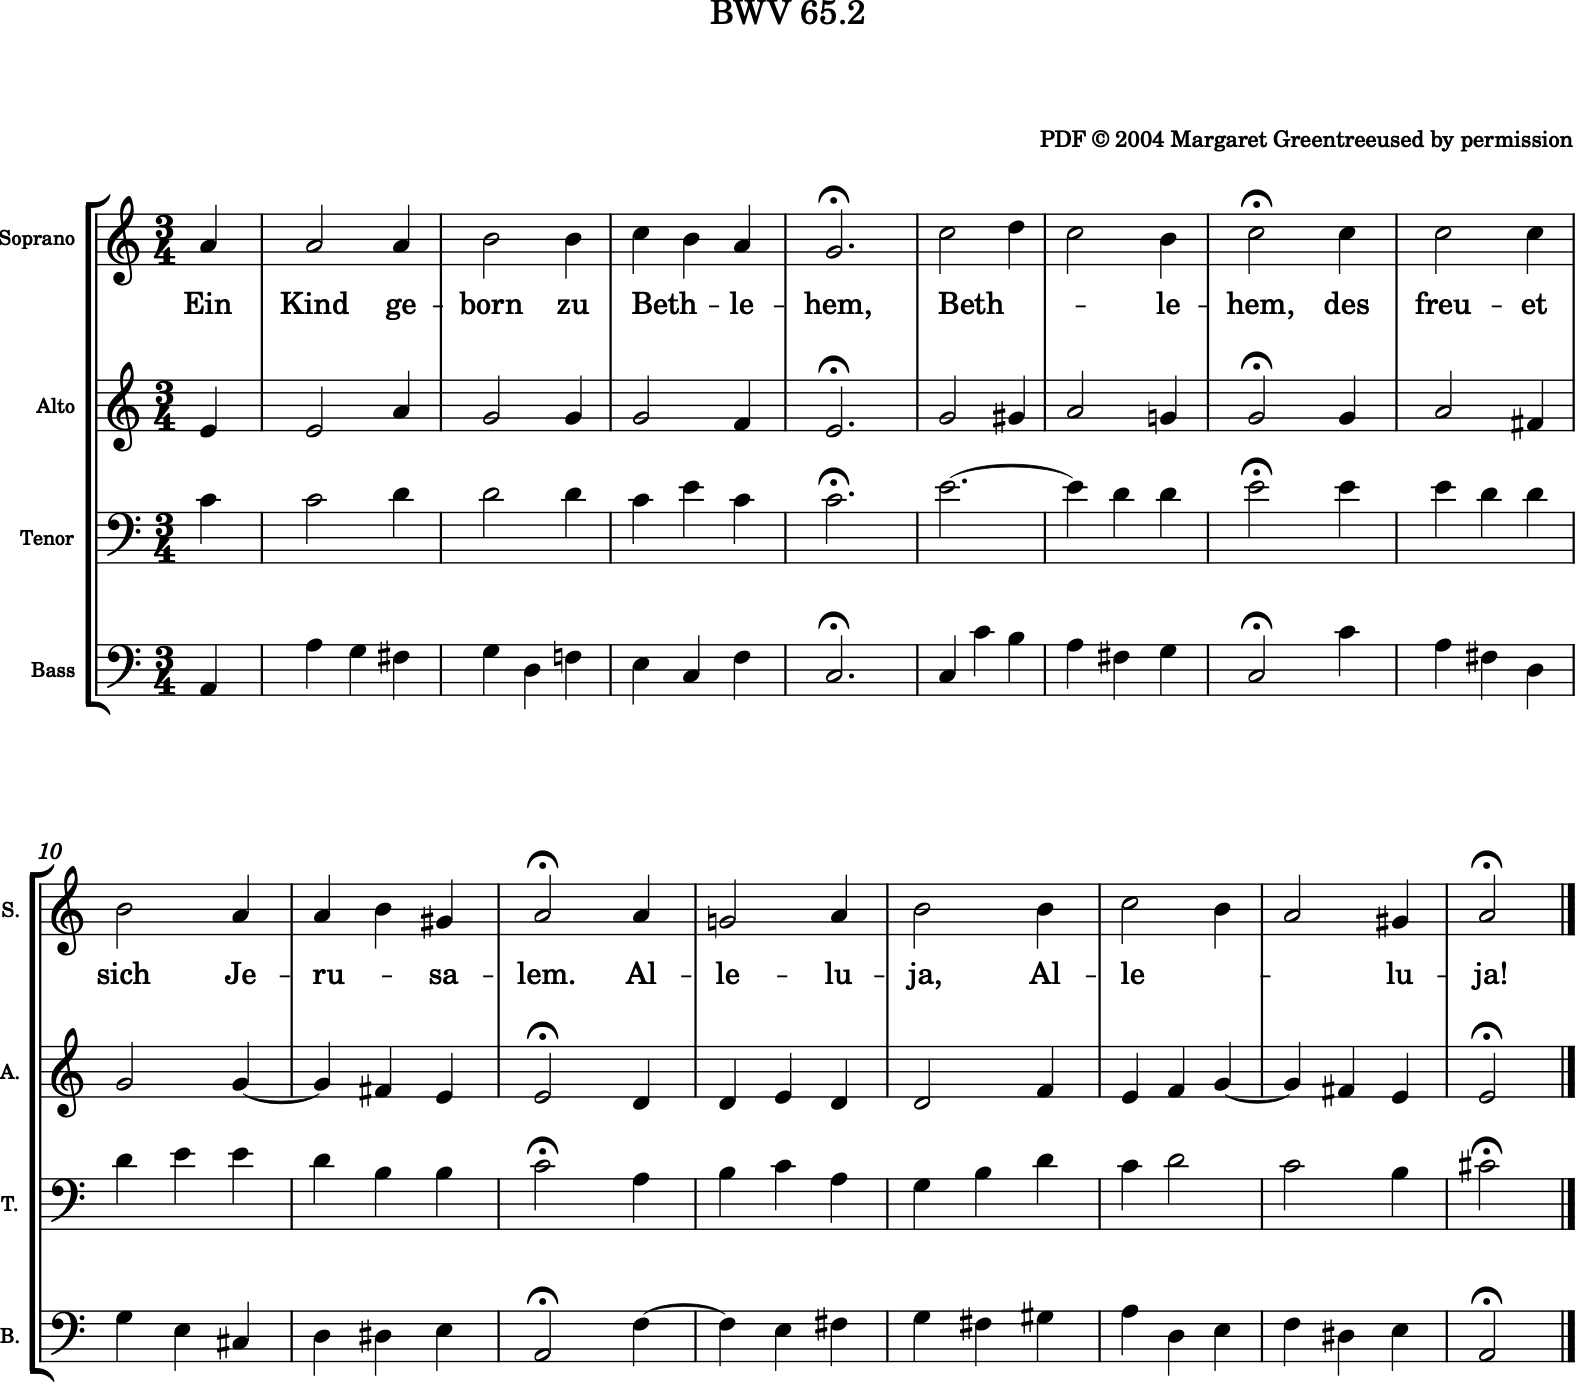

ic| s: <music21.stream.Score 0x1671b4220>


<music21.stream.Score 0x1671b4220>

In [4]:
import music21

s = music21.corpus.parse('bach/bwv65.2.xml')
s.show()  # Need to have software installed, e.g. MuseScore
ic(s)



### Read some info from MIDI



In [5]:
from music21 import midi

mf = midi.MidiFile()
mf.open(mid_eg)
mf.read()
mf.close()
ic(mf.tracks)
ic(mf.tracks[0])
ic(mf.tracks[1])
t = mf.tracks[2]
ic(t.events[:10])
t = mf.tracks[3]
ic(t.events[:10])

t = mf.tracks[8]
ic(t.events[60:80])  # Why all controller changes???



ic| mf.tracks: [<music21.midi.MidiTrack 0 -- 4 events>,
                <music21.midi.MidiTrack 1 -- 4 events>,
                <music21.midi.MidiTrack 2 -- 1118 events>,
                <music21.midi.MidiTrack 3 -- 1822 events>,
                <music21.midi.MidiTrack 4 -- 158 events>,
                <music21.midi.MidiTrack 5 -- 334 events>,
                <music21.midi.MidiTrack 6 -- 158 events>,
                <music21.midi.MidiTrack 7 -- 1938 events>,
                <music21.midi.MidiTrack 8 -- 94 events>,
                <music21.midi.MidiTrack 9 -- 94 events>,
                <music21.midi.MidiTrack 10 -- 82 events>]
ic| mf.tracks[0]: <music21.midi.MidiTrack 0 -- 4 events>
ic| mf.tracks[1]: <music21.midi.MidiTrack 1 -- 4 events>
ic| t.events[:10]: [<music21.midi.DeltaTime (empty) track=2, channel=None>,
                    <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=2, channel=None, data=b'Voice'>,
                    <music21.midi.DeltaTime (empty) track=2, channel=No

[<music21.midi.DeltaTime (empty) track=8, channel=None>,
 <music21.midi.MidiEvent PITCH_BEND, track=8, channel=1, parameter1=0, parameter2=64>,
 <music21.midi.DeltaTime (empty) track=8, channel=None>,
 <music21.midi.MidiEvent PROGRAM_CHANGE, track=8, channel=1, data=0>,
 <music21.midi.DeltaTime t=1, track=8, channel=None>,
 <music21.midi.MidiEvent CONTROLLER_CHANGE, track=8, channel=1, parameter1=101, parameter2=0>,
 <music21.midi.DeltaTime (empty) track=8, channel=None>,
 <music21.midi.MidiEvent CONTROLLER_CHANGE, track=8, channel=1, parameter1=100, parameter2=0>,
 <music21.midi.DeltaTime (empty) track=8, channel=None>,
 <music21.midi.MidiEvent CONTROLLER_CHANGE, track=8, channel=1, parameter1=6, parameter2=12>,
 <music21.midi.DeltaTime (empty) track=8, channel=None>,
 <music21.midi.MidiEvent CONTROLLER_CHANGE, track=8, channel=1, parameter1=10, parameter2=64>,
 <music21.midi.DeltaTime (empty) track=8, channel=None>,
 <music21.midi.MidiEvent CONTROLLER_CHANGE, track=8, channel=1, para

In [6]:
# Modified from https://towardsdatascience.com/how-to-generate-music-using-a-lstm-neural-network-in-keras-68786834d4c5
from music21 import converter, instrument, note, chord


notes = []
midi = converter.parse(mid_eg)
parts = instrument.partitionByInstrument(midi)
if parts:  # file as instrument parts
    # elms = parts.parts[0].recurse()
    ic(parts, len(parts.parts))
    elms = flatten([p.recurse() for p in parts.parts])
    ic(elms[:10])
else:  # notes in a flat structure
    elms = midi.flat.notes
    ic(elms[:10])

for e in elms:
    if type(e) is note.Note:
    # if isinstance(e, note.Note):
        notes.append(str(e.pitch))
    if type(e) is chord.Chord:
    # elif isinstance(e, chord.Chord):
        notes.append('.'.join(str(n) for n in e.normalOrder))

ic(notes[:20])



ic| parts: <music21.stream.Score 0x1675055e0>, len(parts.parts): 7
ic| elms[:10]: [<music21.instrument.Vocalist 'Voice: Voice'>,
                <music21.clef.TrebleClef>,
                <music21.tempo.MetronomeMark Quarter=96.0>,
                <music21.meter.TimeSignature 4/4>,
                <music21.instrument.Flute 'Flute'>,
                <music21.clef.TrebleClef>,
                <music21.tempo.MetronomeMark Quarter=96.0>,
                <music21.meter.TimeSignature 4/4>,
                <music21.note.Rest whole>,
                <music21.note.Rest whole>]
ic| notes[:20]: ['C#5',
                 'E5',
                 'E5',
                 'E5',
                 'E5',
                 'E5',
                 'E5',
                 'C#5',
                 'E5',
                 'E5',
                 'E5',
                 'E5',
                 'E5',
                 'E5',
                 'E5',
                 'E5',
                 'G#5',
                 'G#5',
       

['C#5',
 'E5',
 'E5',
 'E5',
 'E5',
 'E5',
 'E5',
 'C#5',
 'E5',
 'E5',
 'E5',
 'E5',
 'E5',
 'E5',
 'E5',
 'E5',
 'G#5',
 'G#5',
 'G#5',
 'B5']

# pretty_midi


In [7]:
pm = pretty_midi.PrettyMIDI(mid_eg)
ic(pm.instruments)
ic(pm.key_signature_changes)
ic(pm.time_signature_changes)
ic(pm.lyrics)


ic(pm.get_tempo_changes())
ic(pm.get_end_time())
ic(pm.estimate_tempi())
ic(pm.estimate_tempo())
ic(pm.get_beats())
ic(pm.get_downbeats())
ic(pm.get_onsets())
ic(pm.estimate_beat_start())

instrs = [pretty_midi.program_to_instrument_name(i.program) for i in pm.instruments]
ic(instrs)

ic([len(i.notes) for i in pm.instruments])



/usr/local/lib/python3.9/site-packages/pretty_midi/pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
ic| pm.instruments: [Instrument(program=73, is_drum=False, name="Voice"),
                     Instrument(program=90, is_drum=False, name="Lead"),
                     Instrument(program=48, is_drum=False, name="Strings"),
                     Instrument(program=85, is_drum=False, name="Chorus"),
                     Instrument(program=35, is_drum=False, name="Bass #2"),
                     Instrument(program=0, is_drum=True, name="Drums")]
ic| pm.key_signature_changes: []
ic| pm.time_signature_changes: [TimeSignature(numerator=4, denominator=4, time=0.0)]
ic| pm.lyrics: []
ic| pm.get_tempo_changes(): (array([0.]), array([120.]))
ic| pm.get_end_time(): 74.00520833333333
ic| pm.estimate_tempi(): (array([232.54658385, 230.4   

[256, 432, 16, 60, 16, 461]

### Beats



ic| beats.shape: (149,)
    beats: array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
                   5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
                  11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
                  16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
                  22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
                  27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
                  33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
                  38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
                  44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
                  49.5, 50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5,
                  55. , 55.5, 56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. ,
                  60.5, 61. , 61.5, 62. , 62.5, 63. 

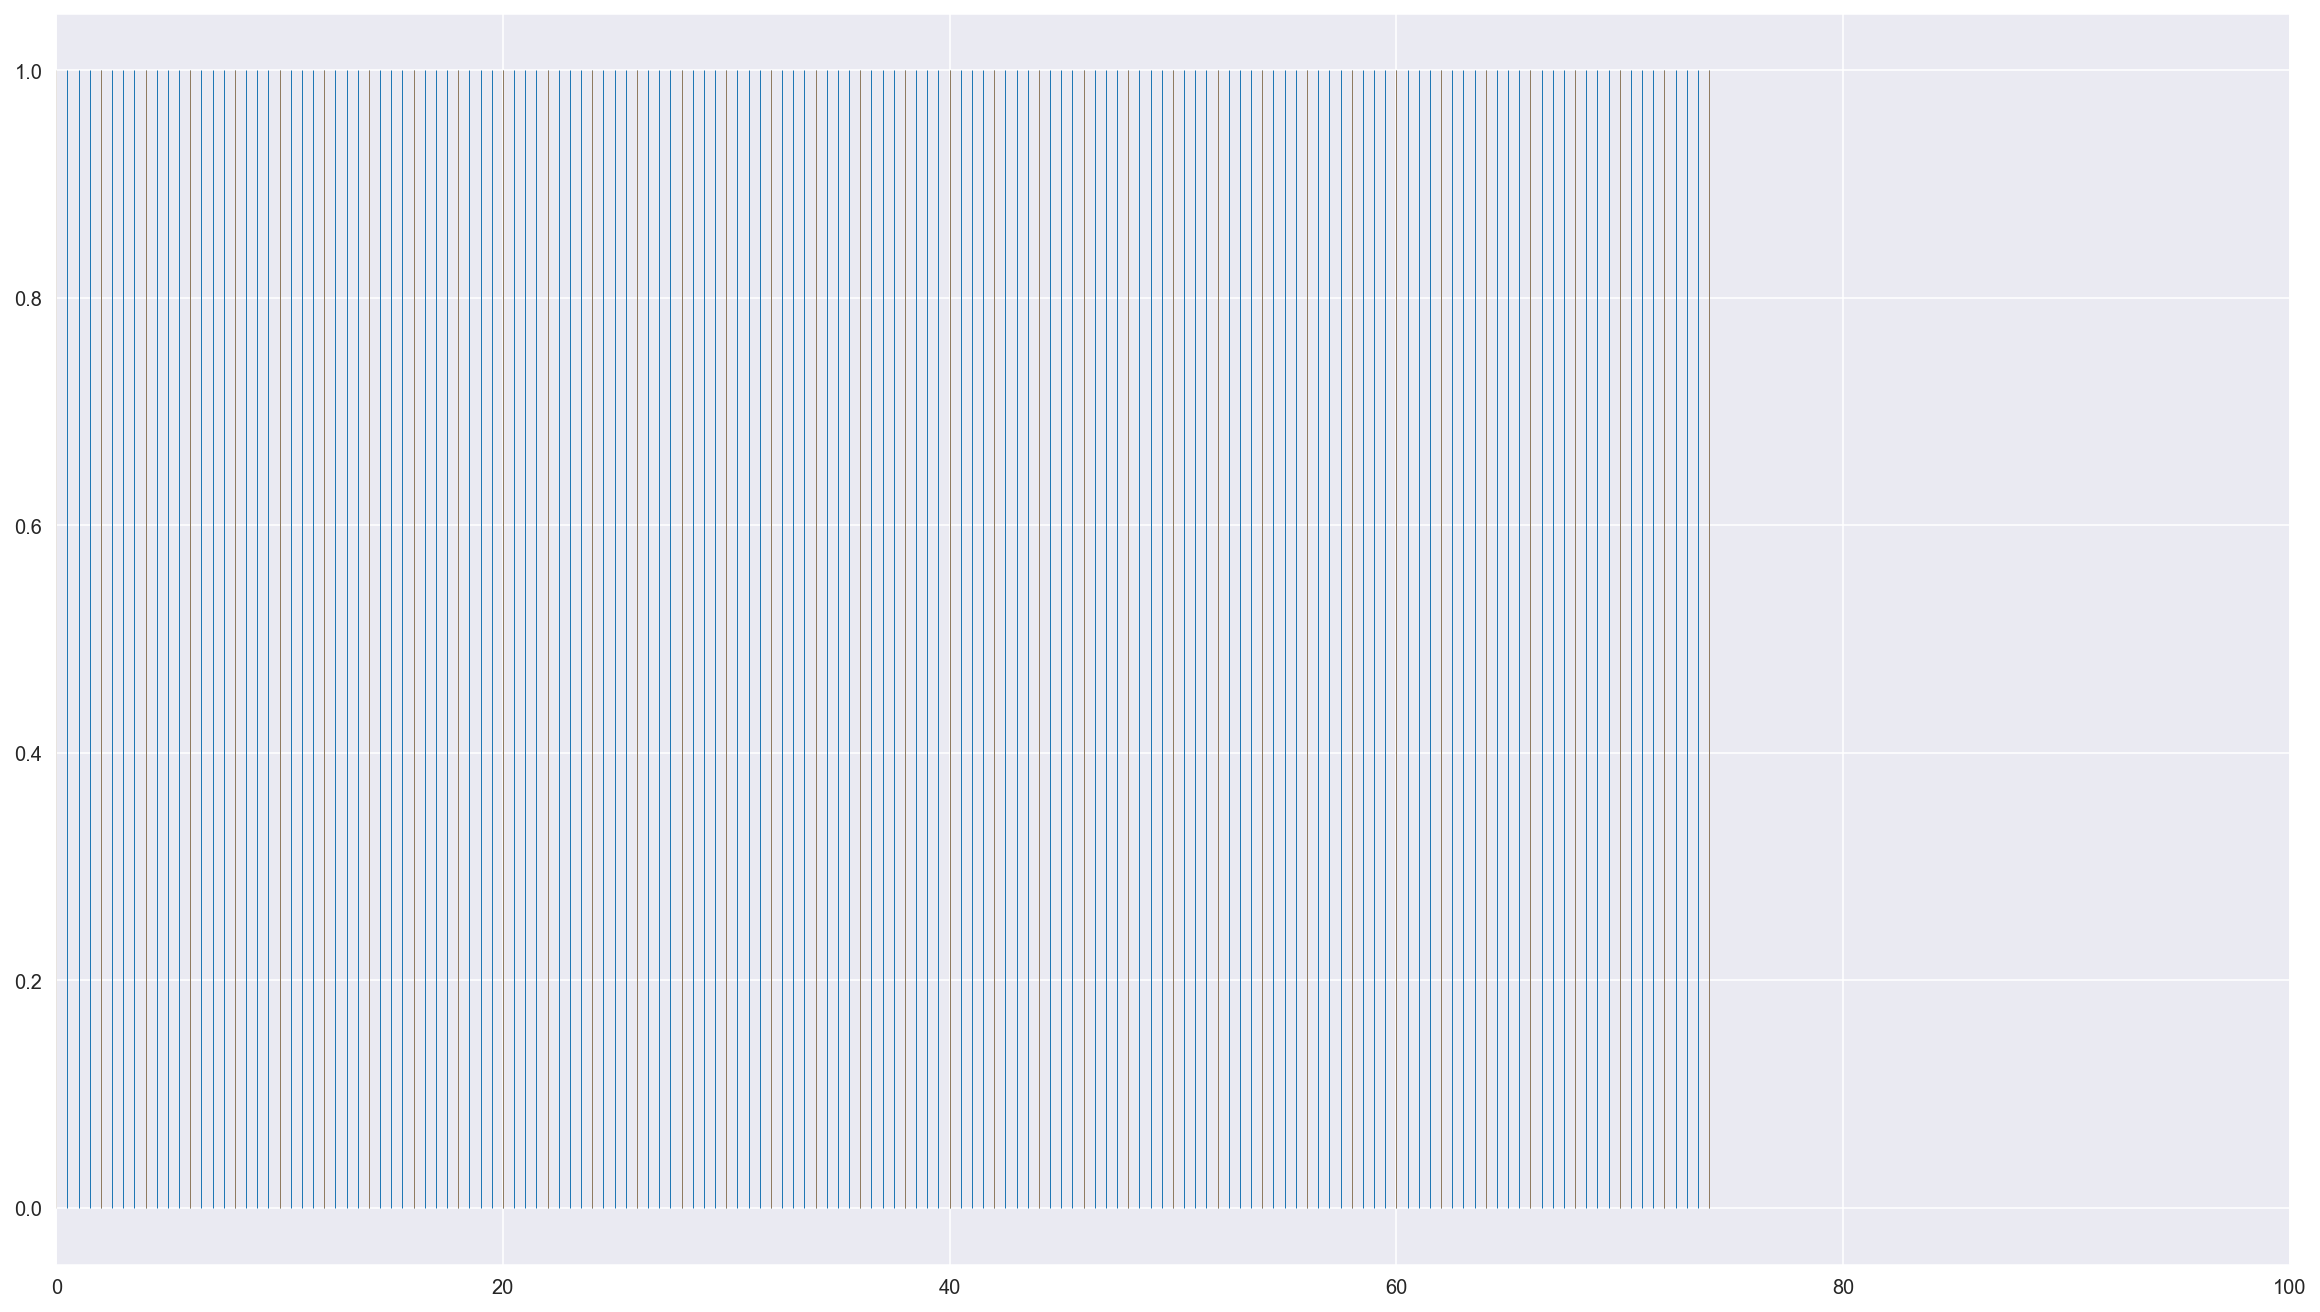

In [8]:
import mir_eval
from mir_eval import display


plt.figure(figsize=(16, 9))
beats = pm.get_beats()
downbeats = pm.get_downbeats()
# ic(beats.shape, beats[:10])
# ic(downbeats.shape, downbeats[:10])
ic(beats.shape, beats)
ic(downbeats.shape, downbeats)
ymin, ymax = plt.ylim()
mir_eval.display.events(beats, base=ymin, height=ymax, lw=0.5)
mir_eval.display.events(downbeats, base=ymin, height=ymax, lw=0.25)
plt.xlim(0, 100);



### Piano roll

ic| pr.shape: (128, 7400)
    pr.dtype: dtype('float64')
    pr[75:80, 920:960]: array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                                  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                                  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                                  0.,   0.,   0.,   0.,   0.,   0.,   0.],
                               [  0.,   0.,   0.,   0.,   0., 100., 100., 100., 100., 100., 100.,
                                100., 100., 100., 100., 100., 100., 100., 100., 200., 200., 200.,
                                200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 100.,
                                100., 100., 100., 100., 100., 100., 100.],
                               [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                                  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         

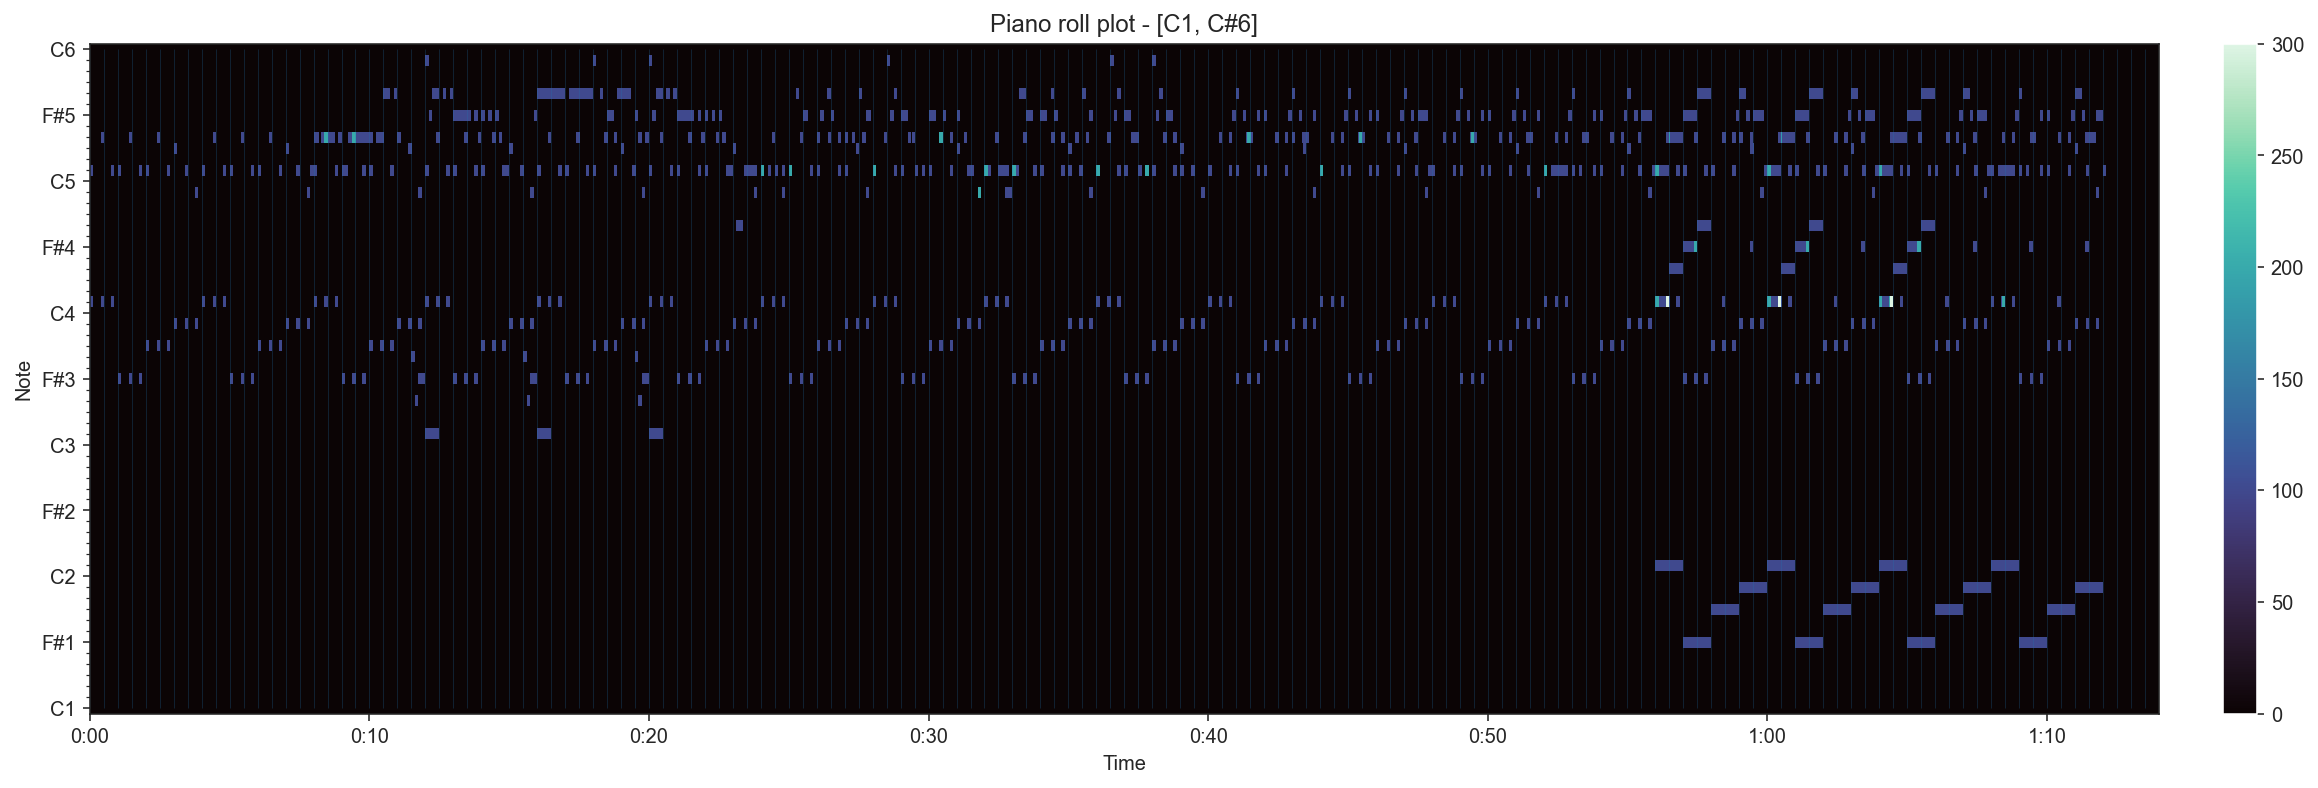

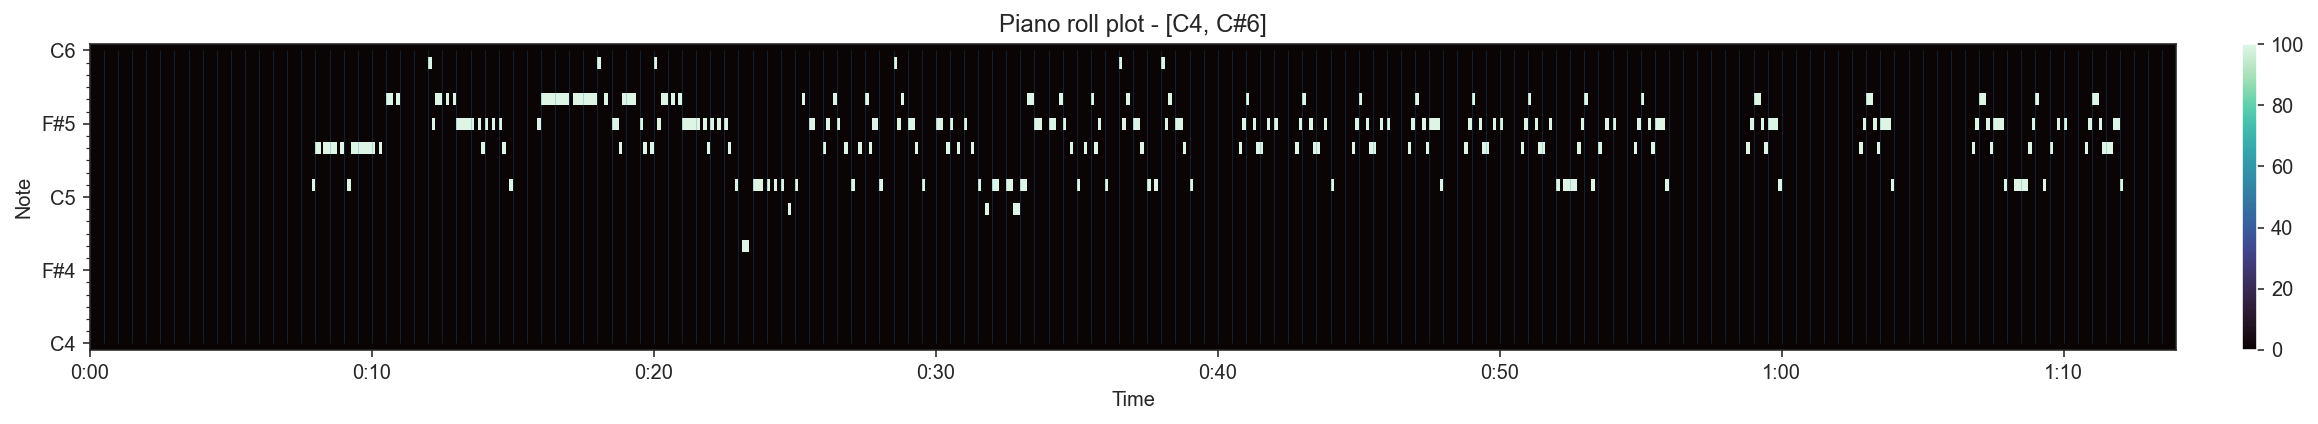

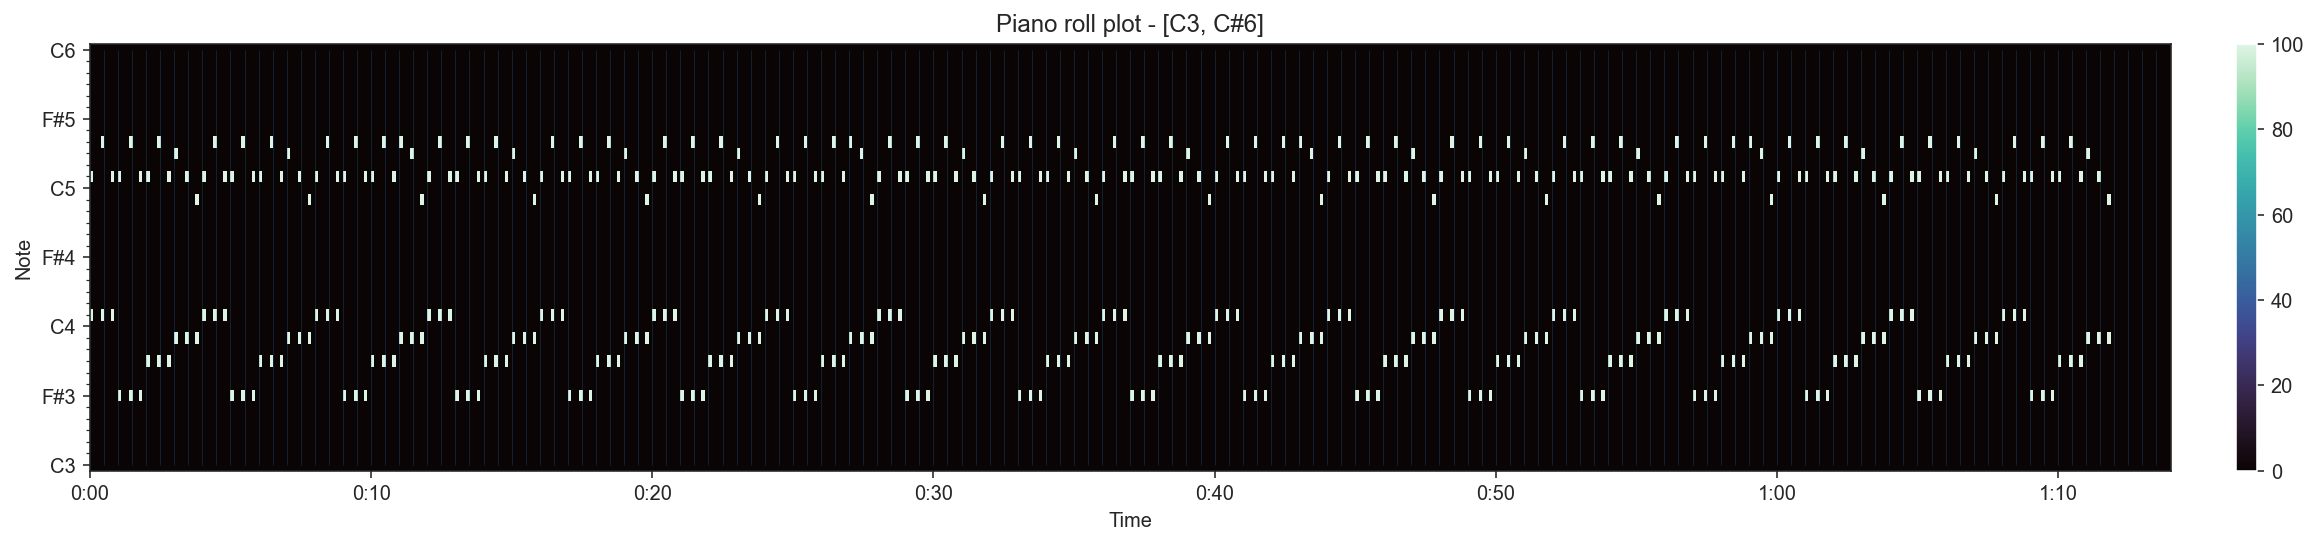

In [9]:
pr = pm.get_piano_roll(fs=100)
ic(pr.shape, pr.dtype, pr[75:80, 920:960])
# ic(np.where(pr > 100))

pr = pm.get_piano_roll(fs=200)
ic(pr.shape)

instr0 = pm.instruments[0]
instr1 = pm.instruments[1]
ic(instr0.get_piano_roll()[76, 920:960])
ic(instr1.get_piano_roll()[76, 920:960])

# Don't understand the librosa warning
Pmu.plot_piano_roll(pm)  # The peak values in the plot is due to overlapping note & time, in multiple tracks
beats = pm.get_beats()
Pmu.plot_piano_roll(instr0, with_beats=beats)
Pmu.plot_piano_roll(instr1, with_beats=beats)



### Instruments for MIDI



In [10]:
instrument_nms = list(map(pretty_midi.program_to_instrument_name, range(128)))
ic(instrument_nms)

note_nms = {n: pretty_midi.note_number_to_name(n) for n in range(128)}
ic(note_nms)



ic| instrument_nms: ['Acoustic Grand Piano',
                     'Bright Acoustic Piano',
                     'Electric Grand Piano',
                     'Honky-tonk Piano',
                     'Electric Piano 1',
                     'Electric Piano 2',
                     'Harpsichord',
                     'Clavinet',
                     'Celesta',
                     'Glockenspiel',
                     'Music Box',
                     'Vibraphone',
                     'Marimba',
                     'Xylophone',
                     'Tubular Bells',
                     'Dulcimer',
                     'Drawbar Organ',
                     'Percussive Organ',
                     'Rock Organ',
                     'Church Organ',
                     'Reed Organ',
                     'Accordion',
                     'Harmonica',
                     'Tango Accordion',
                     'Acoustic Guitar (nylon)',
                     'Acoustic Guitar (steel)',
       

{0: 'C-1',
 1: 'C#-1',
 2: 'D-1',
 3: 'D#-1',
 4: 'E-1',
 5: 'F-1',
 6: 'F#-1',
 7: 'G-1',
 8: 'G#-1',
 9: 'A-1',
 10: 'A#-1',
 11: 'B-1',
 12: 'C0',
 13: 'C#0',
 14: 'D0',
 15: 'D#0',
 16: 'E0',
 17: 'F0',
 18: 'F#0',
 19: 'G0',
 20: 'G#0',
 21: 'A0',
 22: 'A#0',
 23: 'B0',
 24: 'C1',
 25: 'C#1',
 26: 'D1',
 27: 'D#1',
 28: 'E1',
 29: 'F1',
 30: 'F#1',
 31: 'G1',
 32: 'G#1',
 33: 'A1',
 34: 'A#1',
 35: 'B1',
 36: 'C2',
 37: 'C#2',
 38: 'D2',
 39: 'D#2',
 40: 'E2',
 41: 'F2',
 42: 'F#2',
 43: 'G2',
 44: 'G#2',
 45: 'A2',
 46: 'A#2',
 47: 'B2',
 48: 'C3',
 49: 'C#3',
 50: 'D3',
 51: 'D#3',
 52: 'E3',
 53: 'F3',
 54: 'F#3',
 55: 'G3',
 56: 'G#3',
 57: 'A3',
 58: 'A#3',
 59: 'B3',
 60: 'C4',
 61: 'C#4',
 62: 'D4',
 63: 'D#4',
 64: 'E4',
 65: 'F4',
 66: 'F#4',
 67: 'G4',
 68: 'G#4',
 69: 'A4',
 70: 'A#4',
 71: 'B4',
 72: 'C5',
 73: 'C#5',
 74: 'D5',
 75: 'D#5',
 76: 'E5',
 77: 'F5',
 78: 'F#5',
 79: 'G5',
 80: 'G#5',
 81: 'A5',
 82: 'A#5',
 83: 'B5',
 84: 'C6',
 85: 'C#6',
 86: 'D6',
 87: 

### Get the note pitches


ic| len(cc): 32
    cc[:10]: [ControlChange(number=10, value=64, time=0.000000),
              ControlChange(number=7, value=100, time=0.000000),
              ControlChange(number=101, value=0, time=0.000000),
              ControlChange(number=100, value=0, time=0.000000),
              ControlChange(number=6, value=12, time=0.000000),
              ControlChange(number=10, value=64, time=0.000000),
              ControlChange(number=7, value=100, time=0.000000),
              ControlChange(number=101, value=0, time=0.000000),
              ControlChange(number=100, value=0, time=0.000000),
              ControlChange(number=6, value=12, time=0.000000)]
ic| len(notes): 256
    notes[:5]: [Note(start=7.875000, end=8.000000, pitch=73, velocity=100),
                Note(start=8.000000, end=8.208333, pitch=76, velocity=100),
                Note(start=8.250000, end=8.375000, pitch=76, velocity=100),
                Note(start=8.375000, end=8.500000, pitch=76, velocity=100),
            

,pitch
0,73
1,76
2,76
3,76
4,76
...,...
251,78
252,76
253,76
254,78


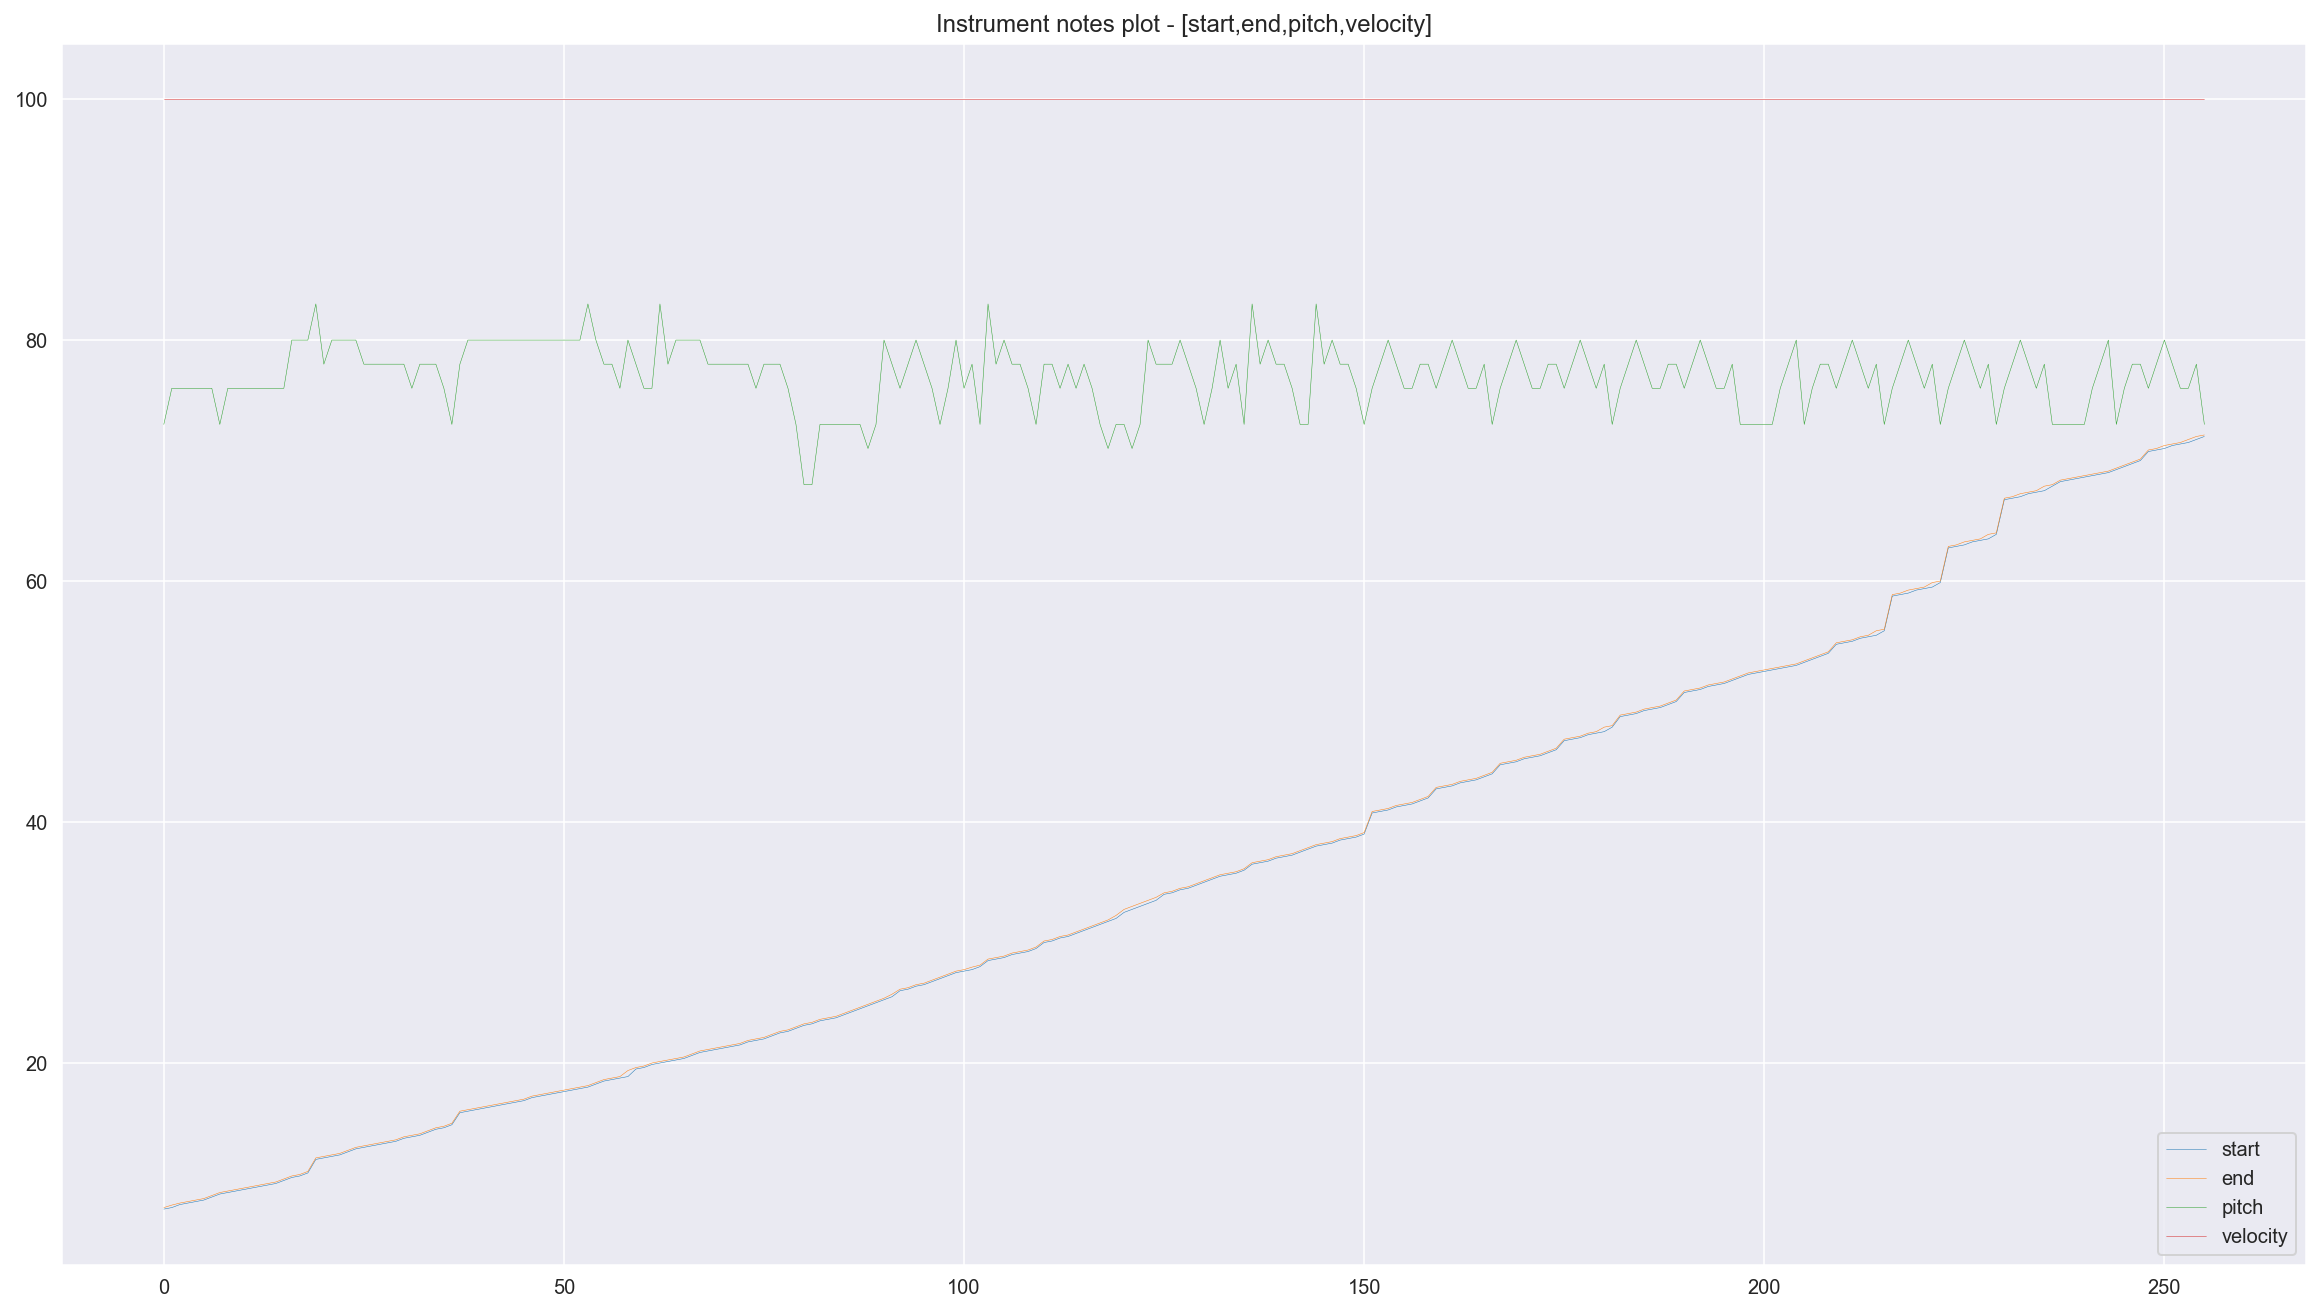

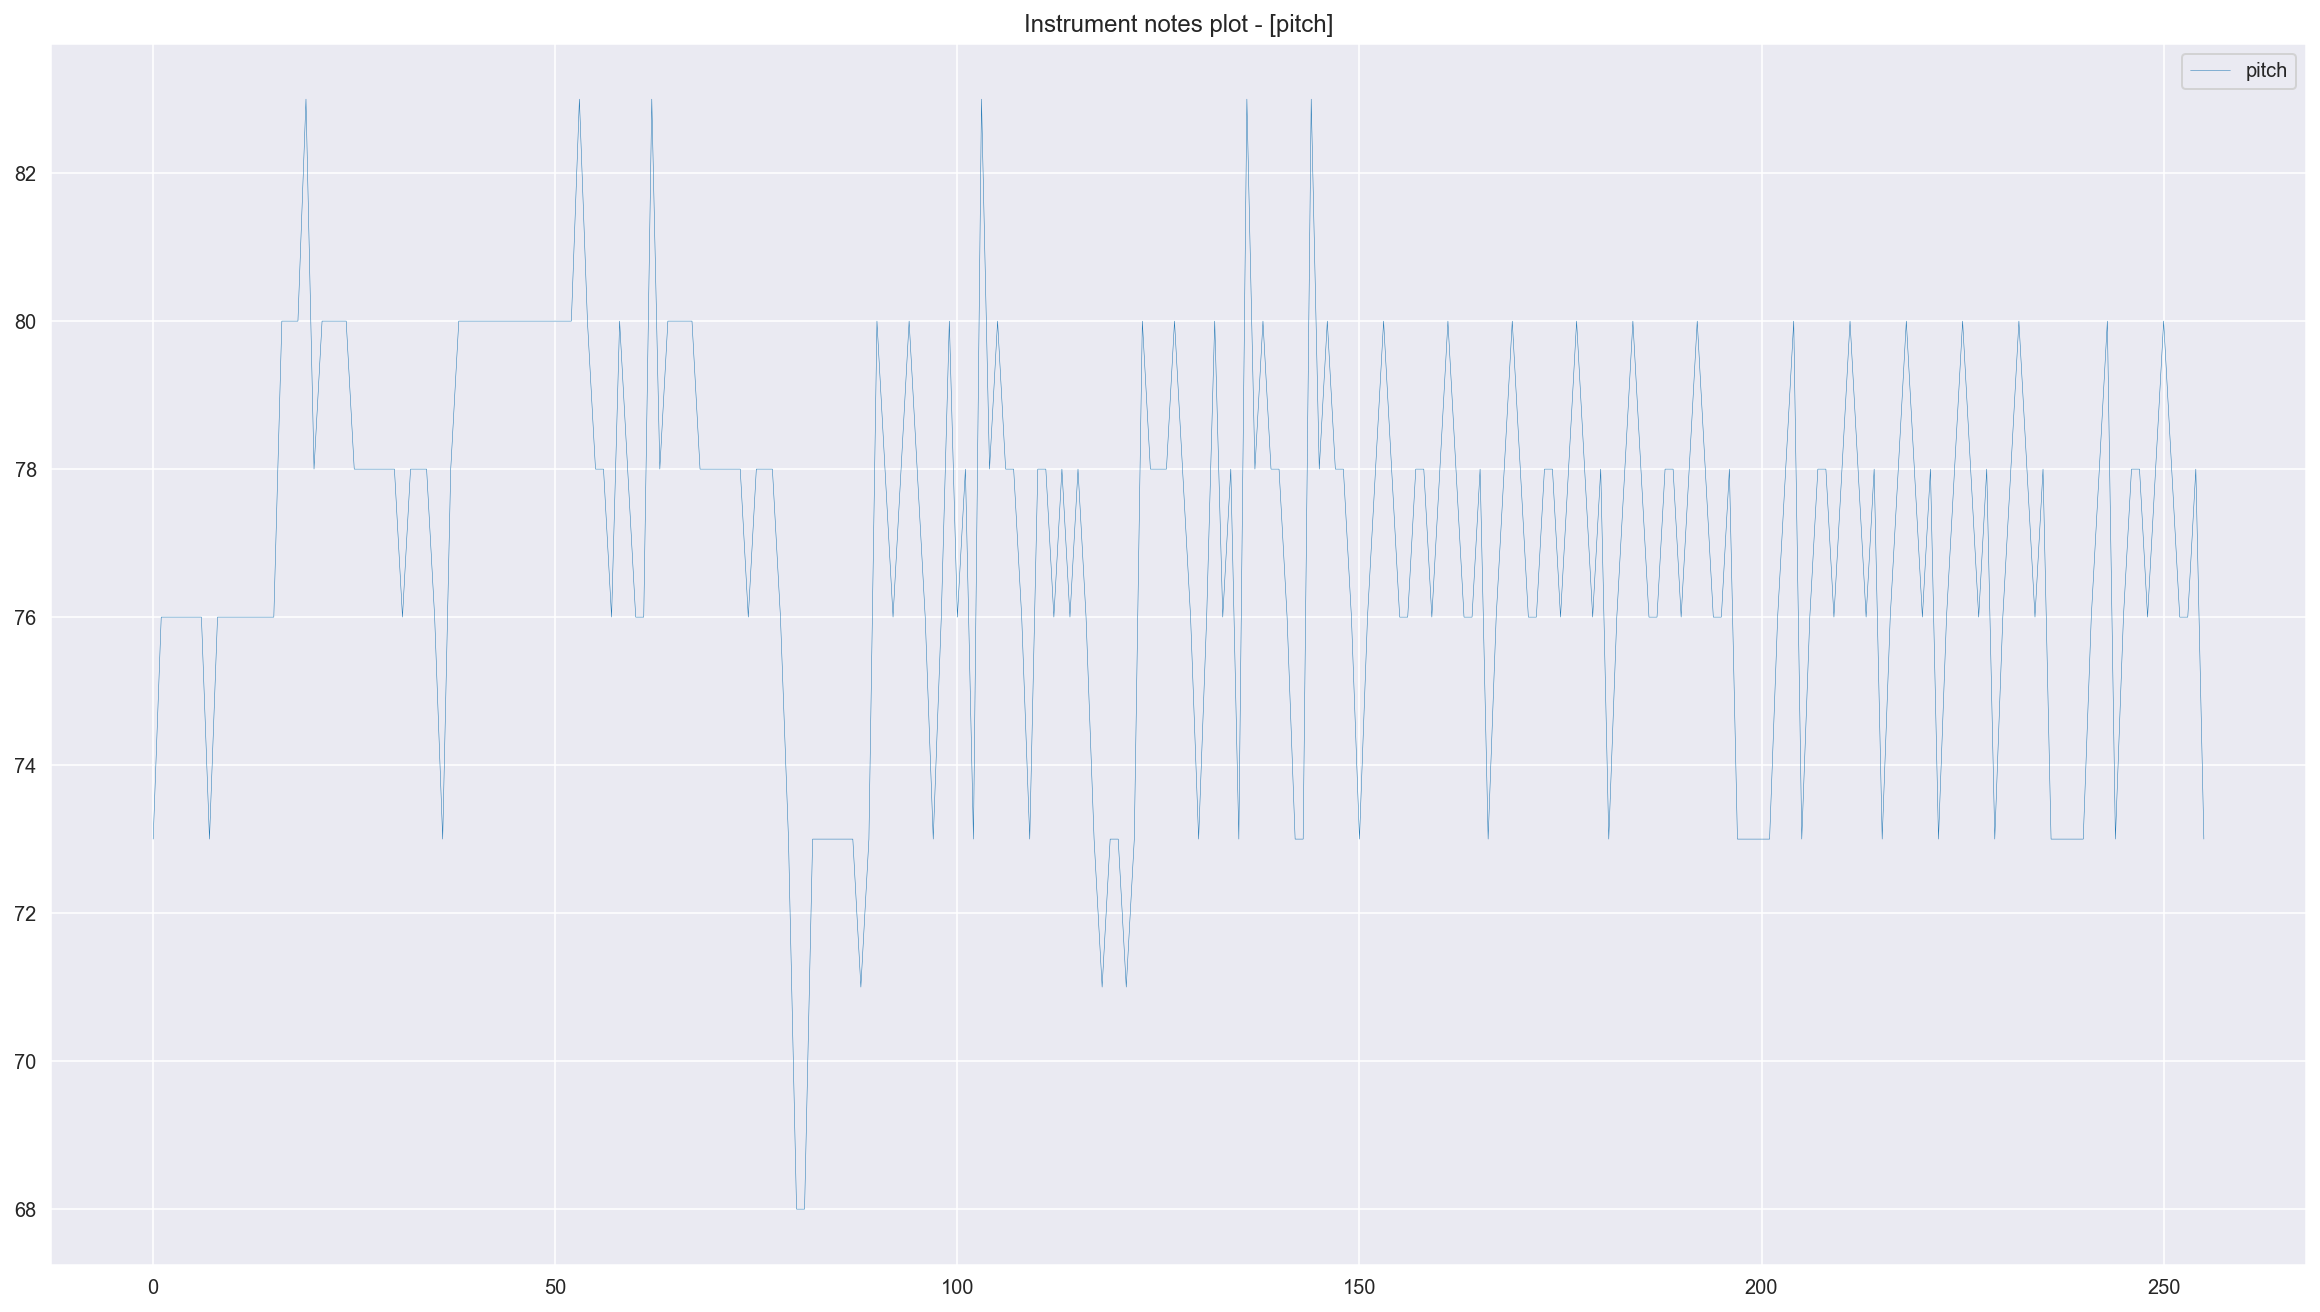

In [11]:
instr = pm.instruments[0]
cc = instr.control_changes
ic(len(cc), cc[:10])
notes = instr.notes
ic(len(notes), notes[:5])

df = Pmu.plot_single_instrument(instr)
df = Pmu.plot_single_instrument(instr, cols=['pitch'], n=256)
ic(df)



### `pretty_midi` returns wrong tempo?



ic| fnm: 'MIDI-eg/AUD_DS1266.mid'
ic| time: array([0.]), temp: array([116.05011818])
/usr/local/lib/python3.9/site-packages/pretty_midi/pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
ic| fnm: 'MIDI-eg/Alan Walker - Faded (Carlo Prato).mid'
ic| time: array([0.]), temp: array([120.])
ic| fnm: 'MIDI-eg/Christina Perri - A Thousand Years (mididb).mid'
ic| time: array([0.]), temp: array([69.00001725])
ic| fnm: 'MIDI-eg/Ed Sheeran - Shape of You (Carlo Prato).mid'
ic| time: array([0.]), temp: array([120.])
ic| fnm: 'MIDI-eg/Joe Hisaishi - Merry Go Round of Life (bitmidi).mid'
ic| time: array([  0.        ,   0.25      ,   6.8846145 ,   7.2255235 ,
                   7.26912812,   7.31430875,   7.360321  ,   7.40749075,
                   7.45683275,   7.50855688,   7.56174825,   7.62272375,
                   8.76557975,  12.66

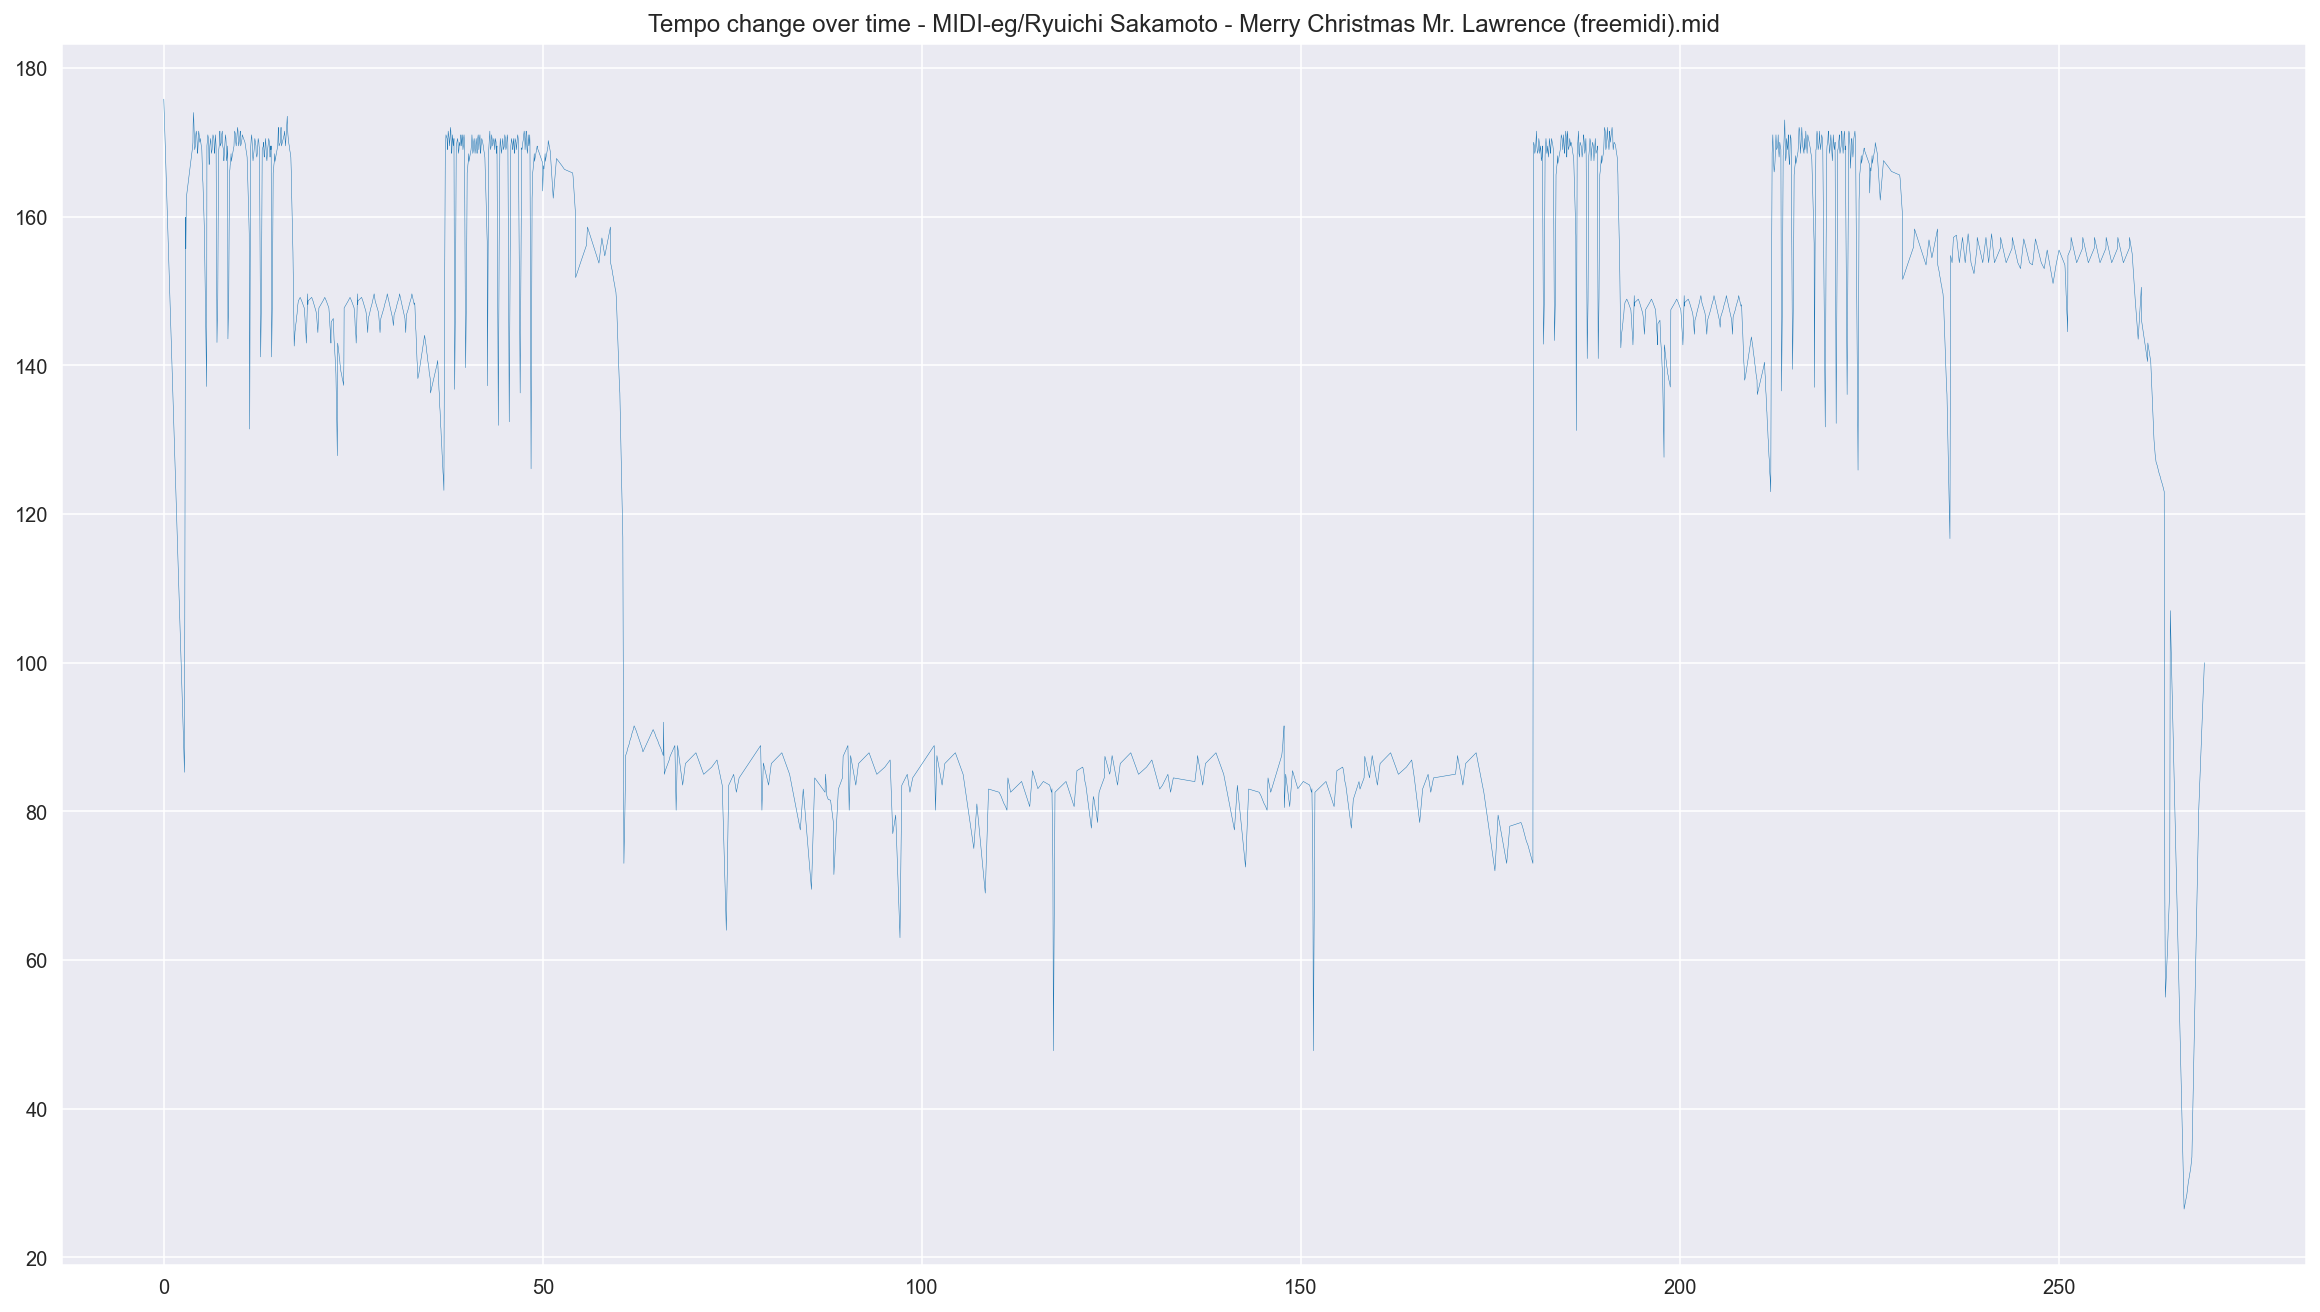

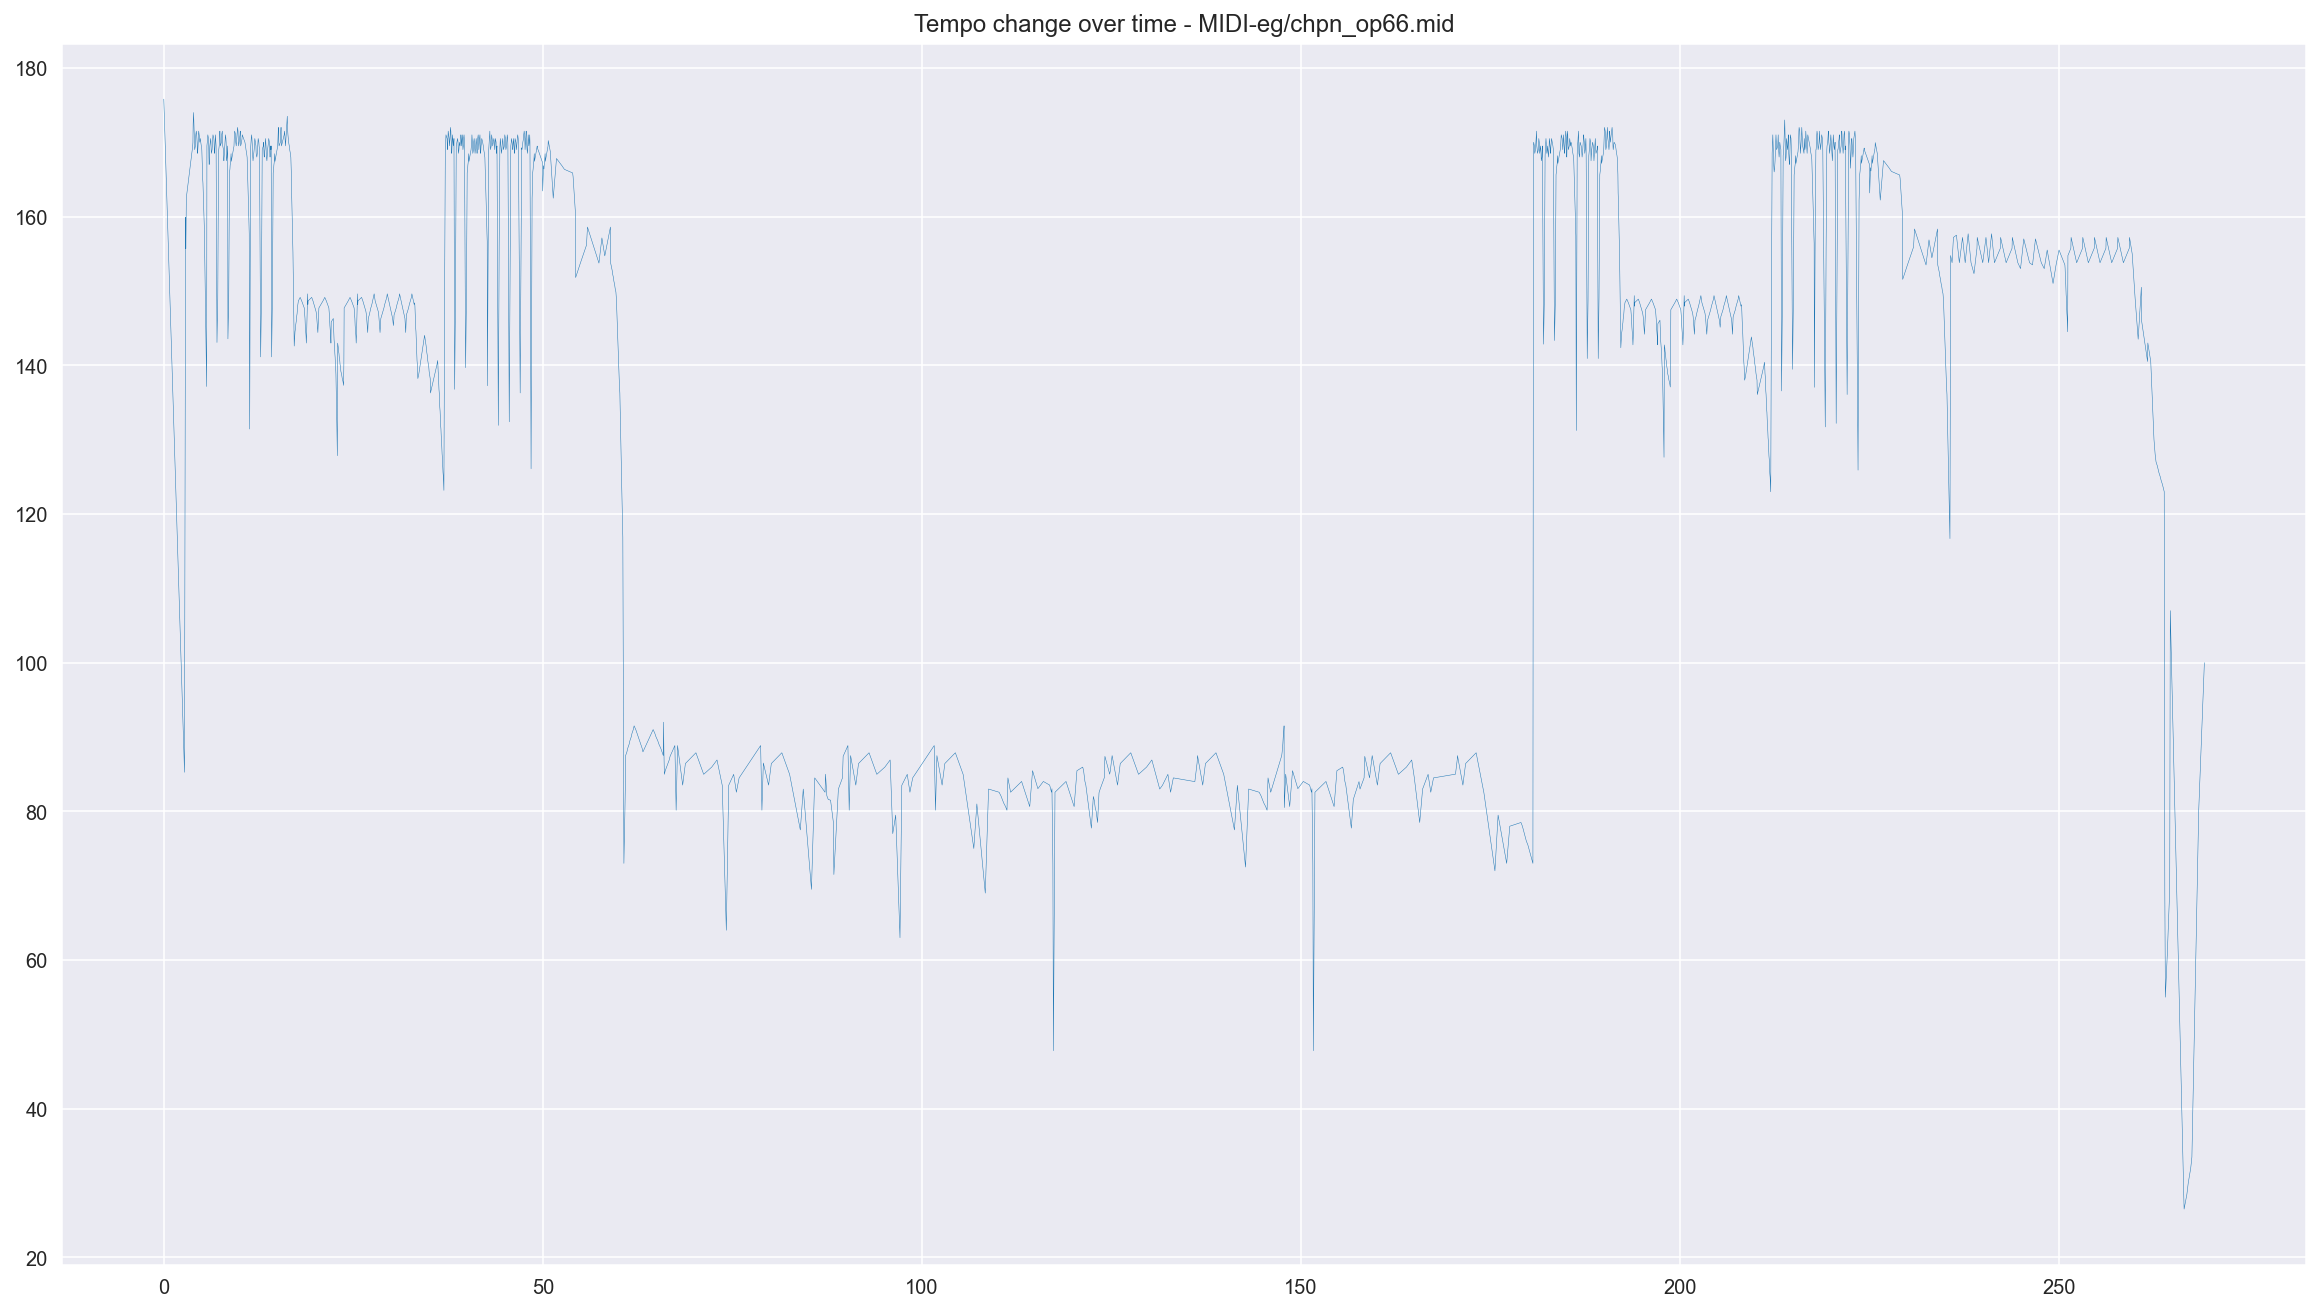

In [12]:
idxs = []
for idx, fnm in enumerate(mids):
    pm = pretty_midi.PrettyMIDI(fnm)
    fnm = mids_pretty[idx]
    time, temp = pm.get_tempo_changes()
    ic(fnm)
    if len(time) <= 100:
        ic(time, temp)
    else:
        idxs.append(idx)
        ic('Too much tempo change')


def _plot_tempo_change(idx_):
    # Suspect many tempo change due to MIDI transcription
    pretty_midi.PrettyMIDI(mids[idx_])
    fnm_ = mids_pretty[idx_]
    time_, temp_ = pm.get_tempo_changes()
    ic(temp_[:10])
    plt.figure(figsize=(16, 9))
    plt.plot(time_, temp_, lw=0.25, ms=0.3)
    plt.title(f'Tempo change over time - {fnm_}')

ic(idxs)
for idx in idxs:
    _plot_tempo_change(idx)  # Why the tempo change is the same??? The library implementation is wrong?



### How about time signatures?



In [13]:
for idx, fnm in enumerate(mids):
    pm = pretty_midi.PrettyMIDI(fnm)
    fnm = mids_pretty[idx]
    ic(fnm, pm.time_signature_changes)
    ic('\n')



ic| fnm: 'MIDI-eg/AUD_DS1266.mid'
    pm.time_signature_changes: [TimeSignature(numerator=4, denominator=4, time=0.0)]
ic| '\n': '
           '
/usr/local/lib/python3.9/site-packages/pretty_midi/pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
ic| fnm: 'MIDI-eg/Alan Walker - Faded (Carlo Prato).mid'
    pm.time_signature_changes: [TimeSignature(numerator=4, denominator=4, time=0.0)]
ic| '\n': '
           '
ic| fnm: 'MIDI-eg/Christina Perri - A Thousand Years (mididb).mid'
    pm.time_signature_changes: [TimeSignature(numerator=6, denominator=8, time=0.0)]
ic| '\n': '
           '
ic| fnm: 'MIDI-eg/Ed Sheeran - Shape of You (Carlo Prato).mid'
    pm.time_signature_changes: [TimeSignature(numerator=4, denominator=4, time=0.0)]
ic| '\n': '
           '
ic| fnm: 'MIDI-eg/Joe Hisaishi - Merry Go Round of Life (bitmidi).mid'
   

## How to break up the file into bars?
The physical time of notes should correspond to bars, given no tempo change


In [14]:
ic(pm.estimate_tempo())  # Not good?



ic| pm.estimate_tempo(): 213.06167348826753


213.06167348826753